In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import h5py  
#import readers as rd
import os
import fiona
import geopandas
import time
from sklearn.neighbors import KernelDensity
import scipy
from astropy.time import Time
import geopandas as gpd

In [2]:
def Rescale(path, outdir):
    j=0
    for file in os.listdir(path):
        if file.endswith('shp'):

            filename = file[3:7]
            points = os.path.join(path,file)
            pts = gpd.read_file(points)
            print(pts.shape)
            print('rangemin',int(pts.AT_dist[0]))
            print('rangemax',int(pts.AT_dist.iloc[-10]))
            print('rangemax2',(len(pts)-10))
            start = list(range(int(pts.AT_dist[0]), (len(pts)-50)))
            #start = list(range(int(pts.AT_dist[0]), (int(pts.AT_dist.iloc[-11]))))
            mid = list(range(int(pts.AT_dist[0]+25), (len(pts)-25)))
            stop = list(range(int(pts.AT_dist[0]+50), (len(pts))))
            #mid = list(range(int(pts.AT_dist[5]), (int(pts.AT_dist.iloc[-6]))))
            #stop = list(range(int(pts.AT_dist[10]), (int(pts.AT_dist.iloc[-1]))))
            
            i = 0
            AT_dist_list =[]
            ESD_list = []
            geometry_list = []
            DEM_list = []
            ESD_std_list = []
            SLOPE_list = []
            
            for i in range(len(start)):

                ATdist = (pts.AT_dist[start[i]:stop[i]]).median()
                #print(ATdist)
                ESD = (pts.SD[start[i]:stop[i]]).mean()
                #print('ESD', ESD)
                geometry = (pts.geometry[mid[i]])
                SLOPE = (pts.SLOPE[mid[i]])
                dem = (pts.DEM[mid[i]])
                ESD_std = (pts.SD[start[i]:stop[i]]).std()

                AT_dist_list.append(ATdist)
                ESD_list.append(ESD)
                geometry_list.append(geometry)
                DEM_list.append(dem)
                ESD_std_list.append(ESD_std)
                SLOPE_list.append(SLOPE)
            print(len(ESD_list))    
            gdf = gpd.GeoDataFrame(list(zip(AT_dist_list, ESD_list, geometry_list, ESD_std_list, DEM_list, SLOPE_list)),
                               columns =['AT_dist', 'SD', 'geometry', 'ESD_std','DEM', 'SLOPE'])
            print(gdf.shape)    
            gdf = gdf[gdf['ESD_std'] < 4]
            #gdf = gdf[gdf['AT_dist'] < 87000]
            gdf = gdf[gdf['SD'] < 10]
            gdf = gdf[gdf['SD'] > 0]
            gdf = gdf[gdf['SLOPE'] != 0]
            gdf = gdf.set_crs('EPSG:25833')
            print(gdf.shape)
            if j != 0:
                df_train = pd.concat([df_train,gdf])
            else: 
                df_train = gdf
                j=j+1   
                
            #print(gdf.shape)
            gdf.to_file(outdir+'SD_Rescaled_'+filename+'.shp')
                
            print('processing completed for beam: ', filename, ' Plots below:')
                
            #plt.plot(AT_dist_list, ESD_list, 'o', color='black');
            #plt.plot(AT_dist_list, DEM_list, 'o', color='black');
    return df_train

In [3]:
path = 'C:/Users/Rasmu/Documents/Thesis/Snow_Depth_20201107/'
outdir = 'C:/Users/Rasmu/Documents/Thesis/SD_Rescaled_20201107/'

In [4]:
df_train = Rescale(path, outdir)

(8937, 12)
rangemin 10
rangemax 103570
rangemax2 8927
8877
(8877, 6)
(4861, 6)
processing completed for beam:  2gt1  Plots below:
(3383, 12)
rangemin 180
rangemax 102380
rangemax2 3373
3153
(3153, 6)
(2079, 6)
processing completed for beam:  2gt1  Plots below:
(8272, 12)
rangemin 0
rangemax 103510
rangemax2 8262
8222
(8222, 6)
(4656, 6)
processing completed for beam:  2gt2  Plots below:
(3972, 12)
rangemin 30
rangemax 103220
rangemax2 3962
3892
(3892, 6)
(2671, 6)
processing completed for beam:  2gt2  Plots below:
(8707, 12)
rangemin 60
rangemax 103560
rangemax2 8697
8597
(8597, 6)
(4504, 6)
processing completed for beam:  2gt3  Plots below:
(2222, 12)
rangemin 250
rangemax 103530
rangemax2 2212
1922
(1922, 6)
(1266, 6)
processing completed for beam:  2gt3  Plots below:
(6674, 12)
rangemin 10
rangemax 103510
rangemax2 6664
6614
(6614, 6)
(5188, 6)
processing completed for beam:  gt1l  Plots below:
(2697, 12)
rangemin 180
rangemax 102340
rangemax2 2687
2467
(2467, 6)
(2265, 6)
processin

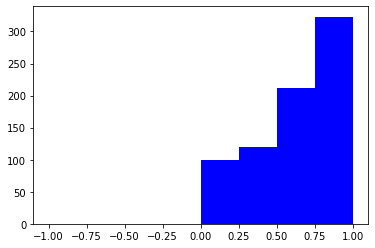

In [18]:
plt.hist(df_train.SD,bins=[-1,-0.75, -0.50,-0.25,-0.0 ,0.25, 0.50, 0.75,1], color='blue');

In [ ]:
df_train.ESD.mean()

In [ ]:
df_train.ESD.std()

In [ ]:
plt.hist(df_train.ESD,bins=[-1,-0.75, -0.50,-0.25,-0.0 ,0.25, 0.50, 0.75,1], color='blue');